In [ ]:
from google.colab import drive

drive.mount("/data")

Mounted at /data


In [ ]:
cd /data/MyDrive/ChatGPT/TestPrompts

/data/MyDrive/ChatGPT/TestPrompts


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
marked_df = pd.read_csv("marked_ads.csv")
marked_df.head()

,Text,Json
0,"продам телевизор mystery, модель mtv-1922lw. ж...","{\n ""place"": """",\n ""products"": [\n {\n ..."
1,"продам телевизор supra, модель: stv-lc2222wd, ...","{\n ""place"": ""укажите место получения"",\n ""p..."
2,"продаю новогодний венок, 35 см, полностью ручн...","{\n ""place"": ""писать в личные сообщения @para..."
3,"продаю две ёлочки, 30 см, полностью ручная раб...","{\n ""place"": ""писать в личные сообщения @para..."
4,продается прилесной участок в коттеджном посел...,"{\n ""place"": ""Поселок Бортневские дачи, 39 км..."


## Приведём к нужному Толоке формату

In [ ]:
marked_df = pd.merge(
    marked_df,
    data[["Text", "Id"]],
    on="Text",
    how='inner',
)

marked_df.shape

(1501, 3)

In [ ]:
marked_df.head()

,Text,Json,Id
0,"продам телевизор mystery, модель mtv-1922lw. ж...","{\n ""place"": """",\n ""products"": [\n {\n ...","{'platform': 'telegram', 'wall_id': 1525972822..."
1,"продам телевизор supra, модель: stv-lc2222wd, ...","{\n ""place"": ""укажите место получения"",\n ""p...","{'platform': 'telegram', 'wall_id': 1525972822..."
2,"продаю новогодний венок, 35 см, полностью ручн...","{\n ""place"": ""писать в личные сообщения @para...","{'platform': 'telegram', 'wall_id': 1525972822..."
3,"продаю две ёлочки, 30 см, полностью ручная раб...","{\n ""place"": ""писать в личные сообщения @para...","{'platform': 'telegram', 'wall_id': 1525972822..."
4,продается прилесной участок в коттеджном посел...,"{\n ""place"": ""Поселок Бортневские дачи, 39 км...","{'platform': 'telegram', 'wall_id': 1525972822..."


In [ ]:
marked_df.to_csv("final_tg_1500.csv", index=False)

In [ ]:
import json

products = {
    "text": [],
    "Json": [],
}

skipped = 0
for ind in tqdm(marked_df.index):
    try:
        obj = json.loads(marked_df.loc[ind, "Json"])
        products["text"] += [marked_df.loc[ind, "Text"]] * len(obj["products"])
        products["Json"] += [product for product in obj["products"]]
    except Exception as e:
        skipped += 1

  0%|          | 0/1501 [00:00<?, ?it/s]

In [ ]:
skipped

6

In [ ]:
products_df = pd.DataFrame(products)
print(products_df.shape)
products_df.head(10)

(2493, 2)


,text,Json
0,"продам телевизор mystery, модель mtv-1922lw. ж...","{'name': 'телевизор mystery, модель mtv-1922lw..."
1,"продам телевизор supra, модель: stv-lc2222wd, ...","{'name': 'телевизор supra, модель: stv-lc2222w..."
2,"продаю новогодний венок, 35 см, полностью ручн...","{'name': 'новогодний венок 35 см', 'price': 26..."
3,"продаю две ёлочки, 30 см, полностью ручная раб...","{'name': 'Елочка ручная работа 30 см', 'price'..."
4,"продаю две ёлочки, 30 см, полностью ручная раб...","{'name': 'Елочка ручная работа 30 см', 'price'..."
5,продается прилесной участок в коттеджном посел...,"{'name': 'Прилесной участок 26 соток', 'price'..."
6,продается прилесной участок в коттеджном посел...,"{'name': 'Прилесной участок 5 соток', 'price':..."
7,"продам ноутбук hp-g7 1080er.17.3 дюйма экран, ...","{'name': 'ноутбук hp-g7 1080er', 'price': 9800..."
8,продам коконы 2-местные до 400кг (15тыс),"{'name': 'коконы 2-местные', 'price': 15000, '..."
9,друзья. продаю новый оригинальный рюкзак guess...,"{'name': 'Рюкзак Guess', 'price': 9890, 'curre..."


In [ ]:
products_df["product_name"] = products_df["Json"].apply(lambda dct: dct["name"])
products_df["product_price"] = products_df["Json"].apply(lambda dct: dct.get("price", np.nan))

In [ ]:
products_df.isna().sum()

text               0
Json               0
product_name       0
product_price    122
dtype: int64

In [ ]:
products_df.dropna(inplace=True)

In [ ]:
def currency_handler(product):
  currency = None
  if currency in product:
    currency = product['currency']
  if currency in ['рубли', '₽', None]:
    currency = 'RUB'
  return currency

products_df['product_currency'] = products_df['Json'].apply(currency_handler)

In [ ]:
def count_handler(product):
  count = None
  if 'count' in product:
    count = product['count']
  if '' == count:
    count = None
  return count

products_df['product_count'] = products_df['Json'].apply(count_handler).values
products_df = products_df[~products_df['product_count'].isna()]

In [ ]:
products_df.drop(columns="Json", inplace=True)

In [ ]:
print(products_df.shape)
products_df.head()

(2039, 5)


,text,product_name,product_price,product_currency,product_count
0,"продам телевизор mystery, модель mtv-1922lw. ж...","телевизор mystery, модель mtv-1922lw",1000,RUB,1
1,"продам телевизор supra, модель: stv-lc2222wd, ...","телевизор supra, модель: stv-lc2222wd",3000,RUB,1
2,"продаю новогодний венок, 35 см, полностью ручн...",новогодний венок 35 см,2600,RUB,1
3,"продаю две ёлочки, 30 см, полностью ручная раб...",Елочка ручная работа 30 см,1500,RUB,1
4,"продаю две ёлочки, 30 см, полностью ручная раб...",Елочка ручная работа 30 см,1500,RUB,1


In [ ]:
products_df = products_df.add_prefix('INPUT:')
products_df.head()

,INPUT:text,INPUT:product_name,INPUT:product_price,INPUT:product_currency,INPUT:product_count
0,"продам телевизор mystery, модель mtv-1922lw. ж...","телевизор mystery, модель mtv-1922lw",1000,RUB,1
1,"продам телевизор supra, модель: stv-lc2222wd, ...","телевизор supra, модель: stv-lc2222wd",3000,RUB,1
2,"продаю новогодний венок, 35 см, полностью ручн...",новогодний венок 35 см,2600,RUB,1
3,"продаю две ёлочки, 30 см, полностью ручная раб...",Елочка ручная работа 30 см,1500,RUB,1
4,"продаю две ёлочки, 30 см, полностью ручная раб...",Елочка ручная работа 30 см,1500,RUB,1


In [ ]:
products_df.to_csv("tg_toloka.csv", index=False, sep='\t')

 ## Немного упростим данные для толокеров

In [ ]:
data = pd.read_csv("tg_toloka.csv", delimiter='\t')
data.dropna(inplace=True)
data.tail()

,INPUT:text,INPUT:product_name,INPUT:product_price,INPUT:product_currency,INPUT:product_count
2034,тип: #продажа\n\nкатегория: #личные_вещи\nподк...,Платье новое в упаковке,1400,RUB,1
2035,тип: #продажа\n\nкатегория: #личные_вещи\nподк...,джинсы с дырками,200,RUB,1
2036,тип: #продажа\n\nкатегория: #личные_вещи\nподк...,блузки,3000,RUB,1
2037,тип: #продажа\n\nкатегория: #личные_вещи\nподк...,лёгкие кофточки летние,3000,RUB,1
2038,тип: #продажа\n\nкатегория: #хобби_и_отдых\nпо...,дореволюционная печатная икона,6000,RUB,1


In [ ]:
data.to_csv("tg_toloka.tsv", index=False, sep='\t')

In [ ]:
data.isna().sum()

INPUT:text                0
INPUT:product_name        0
INPUT:product_price       0
INPUT:product_currency    0
INPUT:product_count       0
dtype: int64

In [ ]:
len(data)

2037

In [ ]:
data["INPUT:product_price"].apply(lambda x: isinstance(x, (int, float))).sum()

0

In [ ]:
data["INPUT:product_price"].apply(lambda x: x.isnumeric() and int(x) > 0).sum()

1965

In [ ]:
data = data[data["INPUT:product_price"].apply(lambda x: x.isnumeric() and int(x) > 0)]

## **Проверим размеры объявлений**

In [ ]:
data2 = data.copy()
data2["Length"] = data2["INPUT:text"].apply(lambda text: len(text))
data2["Strings"] = data2["INPUT:text"].apply(lambda text: text.count('\n') + 1)
data2.head()

,INPUT:text,INPUT:product_name,INPUT:product_price,INPUT:product_currency,INPUT:product_count,Length,Strings
0,"продам телевизор mystery, модель mtv-1922lw. ж...","телевизор mystery, модель mtv-1922lw",1000,RUB,1,192,1
1,"продам телевизор supra, модель: stv-lc2222wd, ...","телевизор supra, модель: stv-lc2222wd",3000,RUB,1,104,1
2,"продаю новогодний венок, 35 см, полностью ручн...",новогодний венок 35 см,2600,RUB,1,144,4
3,"продаю две ёлочки, 30 см, полностью ручная раб...",Елочка ручная работа 30 см,1500,RUB,1,96,3
4,"продаю две ёлочки, 30 см, полностью ручная раб...",Елочка ручная работа 30 см,1500,RUB,1,96,3


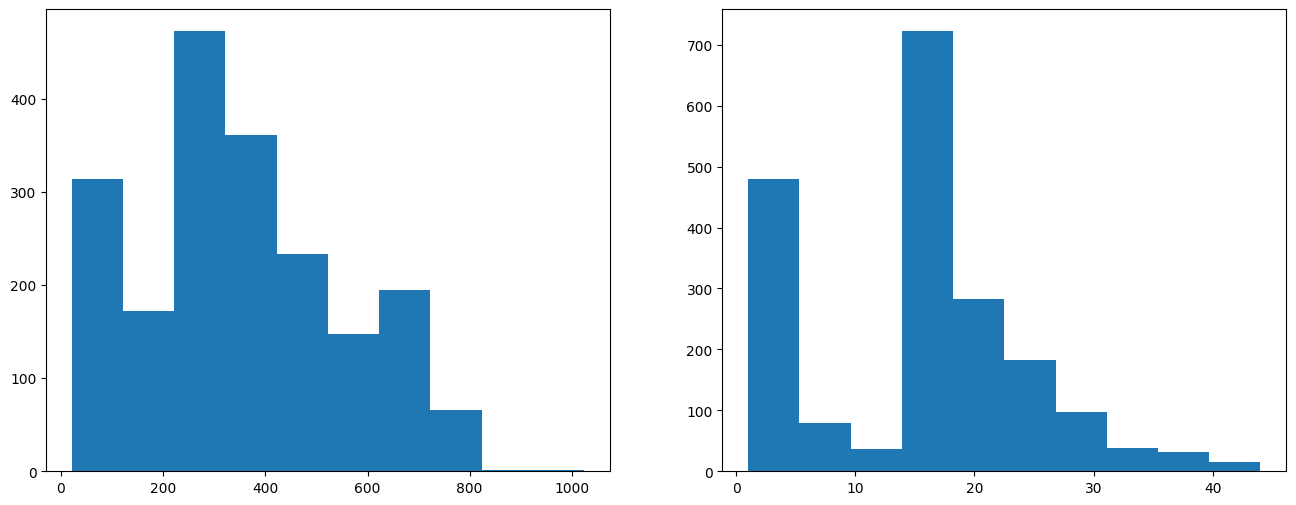

In [ ]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
ax1.hist(data2["Length"])
ax2.hist(data2["Strings"])
plt.show()

### Это очень много, нужно попробовать их сжать

In [ ]:
print(data.loc[2034, "INPUT:text"])

тип: #продажа

категория: #личные_вещи
подкатегория: #женская_одежда_и_обувь
пользователь: #user893

описание:  продам платье новое в упаковке разм 46-48,ткань барби плотная

контакты: 88523735989
цена: 1400
метро: #комендантский
автор: ссылка

отправлено через: @spb_barakholka_bot


In [ ]:
import re

def compress(text):
    filter = r'((тип)|(категория)|(подкатегория)|(пользователь)|(отправлено через)): [#@]\S+'
    parts = list(text.split('\n'))
    parts = [part for part in parts if part.strip() and re.match(filter, part) is None]
    return '\n'.join(parts)

In [ ]:
print(compress(data.loc[2034, "INPUT:text"]))

описание:  продам платье новое в упаковке разм 46-48,ткань барби плотная
контакты: 88523735989
цена: 1400
метро: #комендантский
автор: ссылка


In [ ]:
data2["INPUT:text"] = data2["INPUT:text"].apply(lambda text: compress(text))
data2["Length"] = data2["INPUT:text"].apply(lambda text: len(text))
data2["Strings"] = data2["INPUT:text"].apply(lambda text: text.count('\n') + 1)

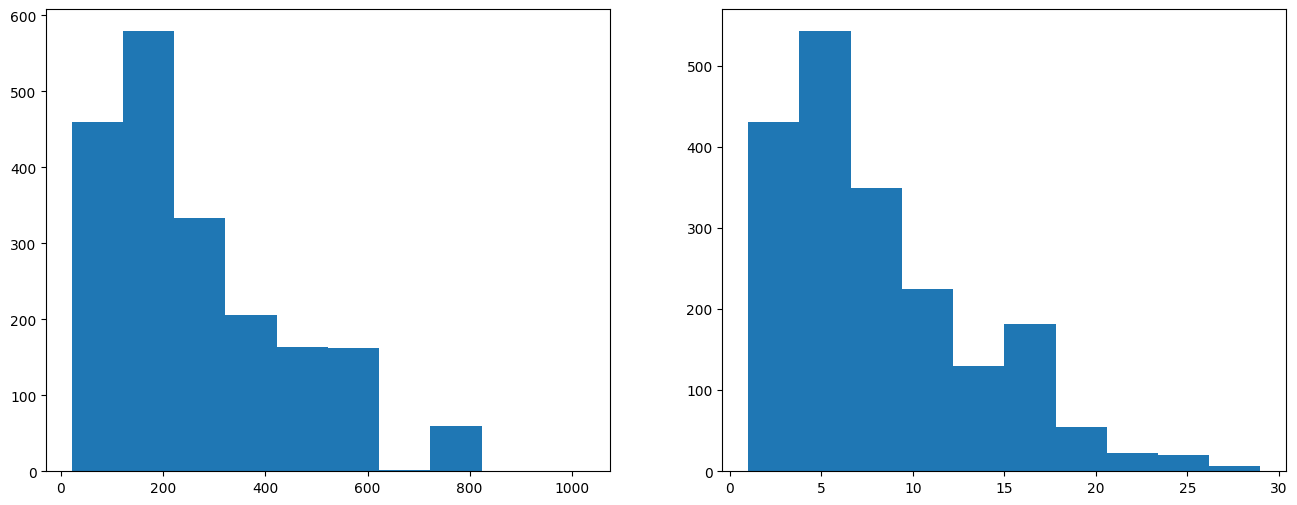

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
ax1.hist(data2["Length"])
ax2.hist(data2["Strings"])
plt.show()

Было

In [ ]:
data["INPUT:text"].apply(lambda text: len(text)).mean(), data["INPUT:text"].apply(lambda text: text.count('\n') + 1).mean()

(353.5994910941476, 14.713486005089058)

In [ ]:
data2["Length"].mean(), data2["Strings"].mean()

(261.1297709923664, 7.9440203562340965)

## **Применим те же преобразования к основному датасету**

In [ ]:
data["INPUT:text"] = data["INPUT:text"].apply(lambda text: compress(text))
data["INPUT:text"].apply(lambda text: len(text)).mean(), data["INPUT:text"].apply(lambda text: text.count('\n') + 1).mean()

(261.1297709923664, 7.9440203562340965)

In [ ]:
data.shape

(1965, 5)

In [ ]:
data.to_csv("tg_toloka_filt_price.tsv", index=False, sep='\t')